## ***This code reads an image in RGB format, converts it to YIQ color space, displays it, then converts it back to RGB and displays the result. Each step is accompanied by comments explaining the process.***

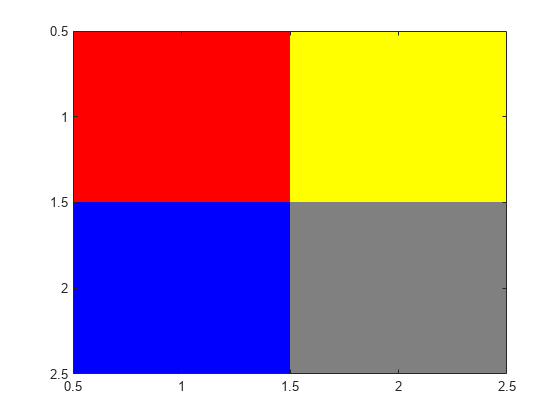

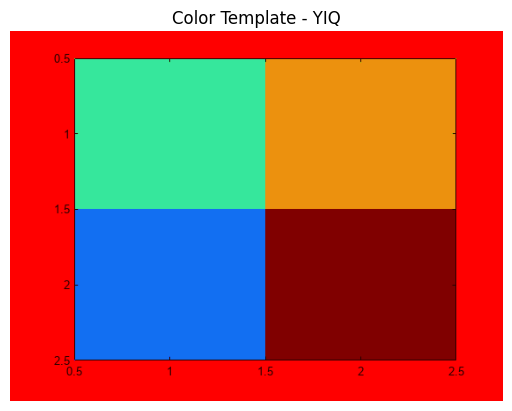

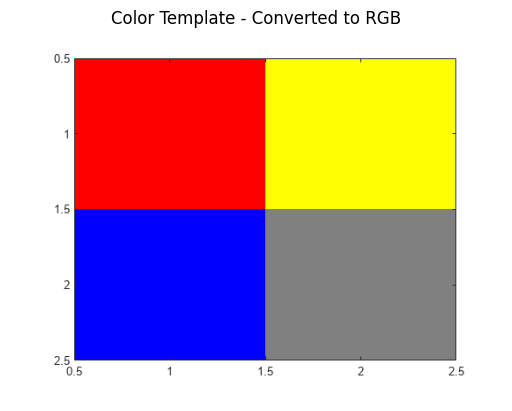

In [4]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import cv2
import numpy as np

# Path to the input image
path1 = "color_template.png"

# Reading the image using OpenCV and converting it to RGB format
img = cv2.cvtColor(cv2.imread(path1), cv2.COLOR_BGR2RGB)

# Creating empty arrays to store YIQ and RGB color space representations of the image
img_RGB = np.zeros(img.shape, dtype=np.float32)
img_YIQ = np.zeros(img.shape, dtype=np.float32)

# Task 1.1 - Convert RGB to YIQ
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        R = img[i][j][0]
        G = img[i][j][1]
        B = img[i][j][2]
        # Convert RGB to YIQ
        img_YIQ[i][j][0] = (0.2126 * R) + (0.7152 * G) + (0.0722 * B)  # Y
        img_YIQ[i][j][1] = (-0.09991 * R) - (0.33609 * G) + (0.436 * B)  # I
        img_YIQ[i][j][2] = (0.615 * R) - (0.55861 * G) - (0.05639 * B)  # Q

# Display the image in YIQ color space
plt.title('Color Template - YIQ')
plt.axis(False)  # Hide axis
plt.imshow(img_YIQ.astype(np.uint8))
plt.show()

# Task 1.2 - Convert YIQ to RGB
for i in range(img_YIQ.shape[0]):
    for j in range(img_YIQ.shape[1]):
        Y = img_YIQ[i][j][0]
        I = img_YIQ[i][j][1]
        Q = img_YIQ[i][j][2]
        # Convert YIQ to RGB
        img_RGB[i][j][0] = (1 * Y) + (0 * I) + (1.28033 * Q)  # R
        img_RGB[i][j][1] = (1 * Y) - (0.21482 * I) - (0.38059 * Q)  # G
        img_RGB[i][j][2] = (1 * Y) + (2.12798 * I) + (0 * Q)  # B

# Display the image converted back to RGB
plt.title('Color Template - Converted to RGB')
plt.axis(False)  # Hide axis
plt.imshow(img_RGB.astype(np.uint8))
plt.show()


# ***# This code performs the following tasks:***

It imports necessary libraries such as OpenCV for image processing, NumPy for
numerical operations, PIL for image manipulation, and Matplotlib for visualization.

It either dynamically reads images from a specified directory (if the directory variable is provided and enabled), or manually adds file names of images.

It loads the images based on the provided file names, converting them from BGR format (default for OpenCV) to RGB format using OpenCV's cvtColor function.

It performs rotation operations on the loaded images, creating new images rotated to the left and right by 90 degrees using NumPy's rot90 function and PIL's Image.fromarray function.

It resizes the loaded images to half of their original size while maintaining the aspect ratio, using OpenCV's resize function.

It performs vertical and horizontal flipping operations on the loaded images, creating new images flipped vertically and horizontally using OpenCV's flip function.

It visualizes the original images along with their manipulated versions (rotated left, rotated right, flipped vertically, flipped horizontally, and resized) using Matplotlib, displaying them in a grid layout with appropriate titles.

Overall, the code demonstrates basic image processing operations such as rotation, resizing, and flipping, and visualizes the results for each image in the provided file list.

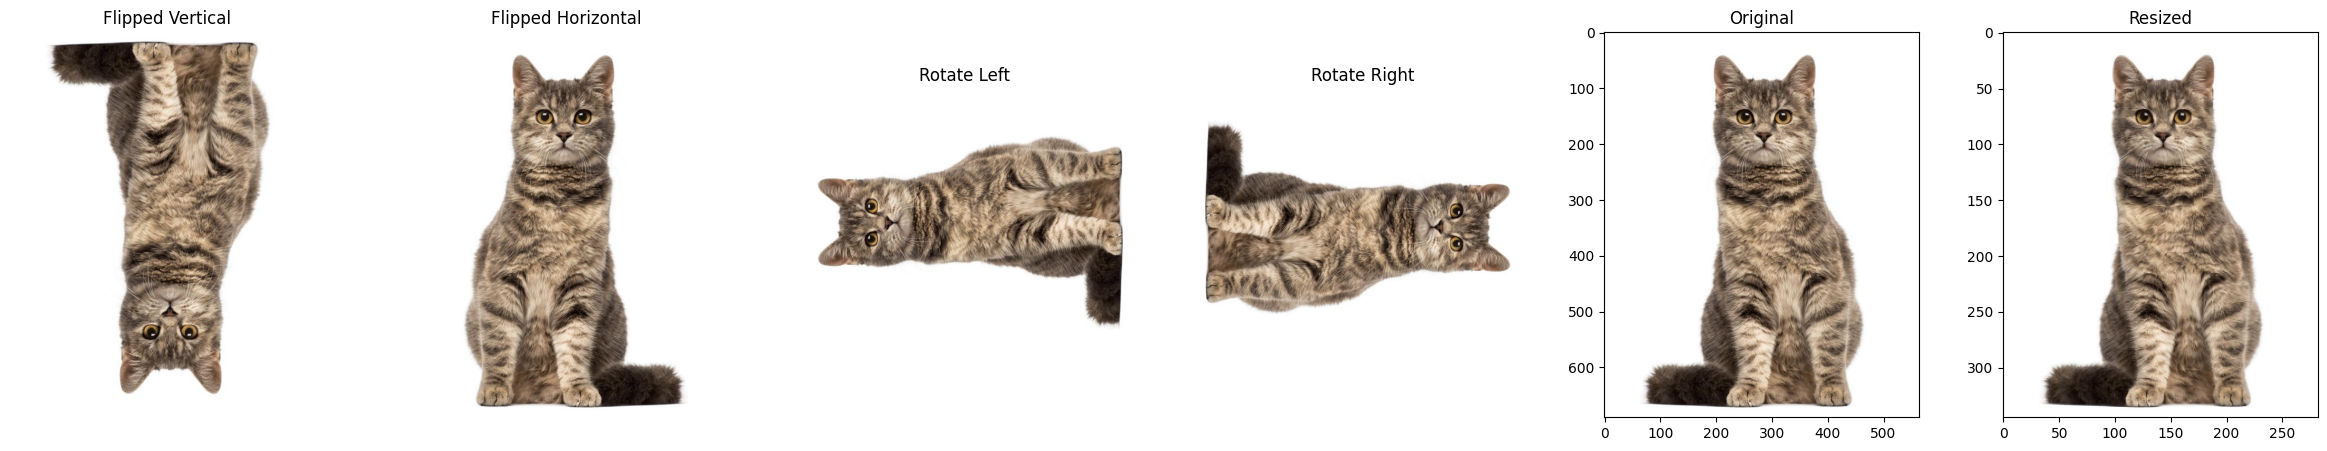

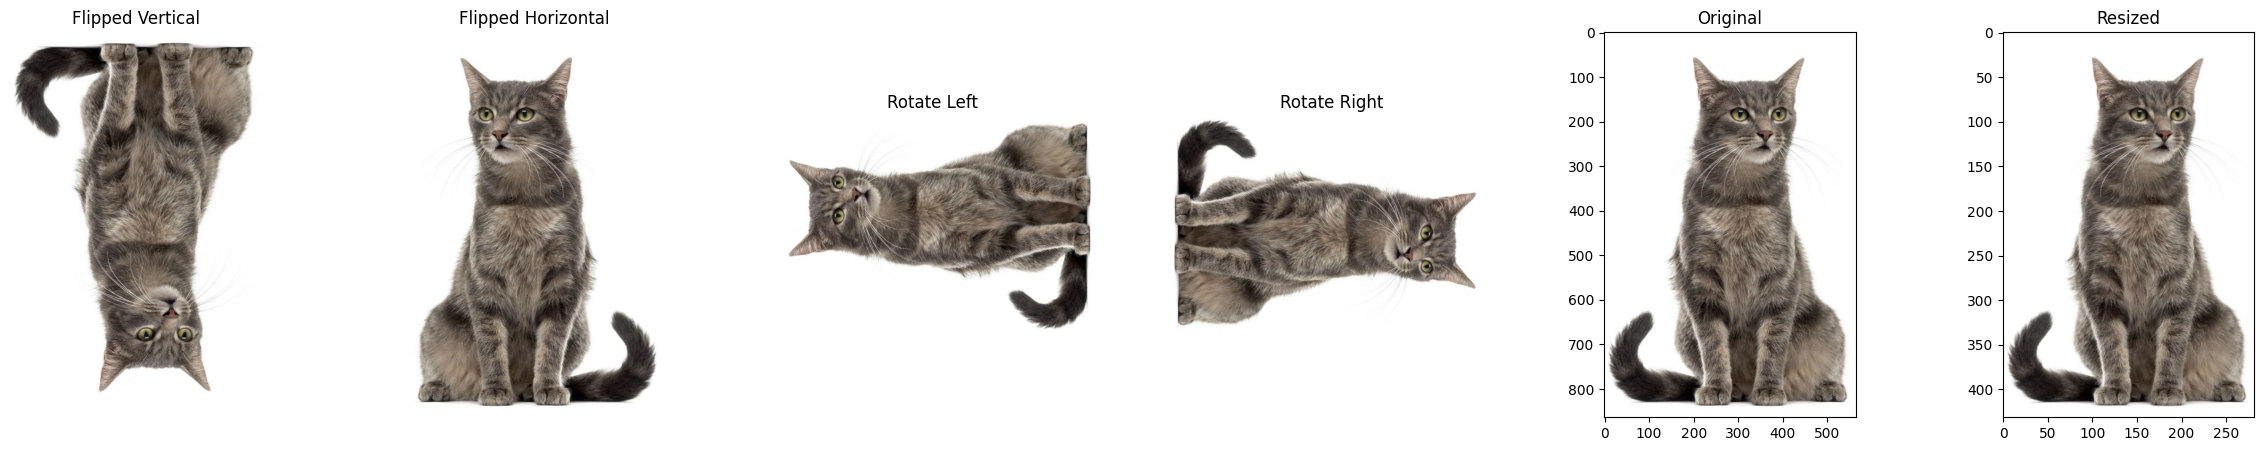

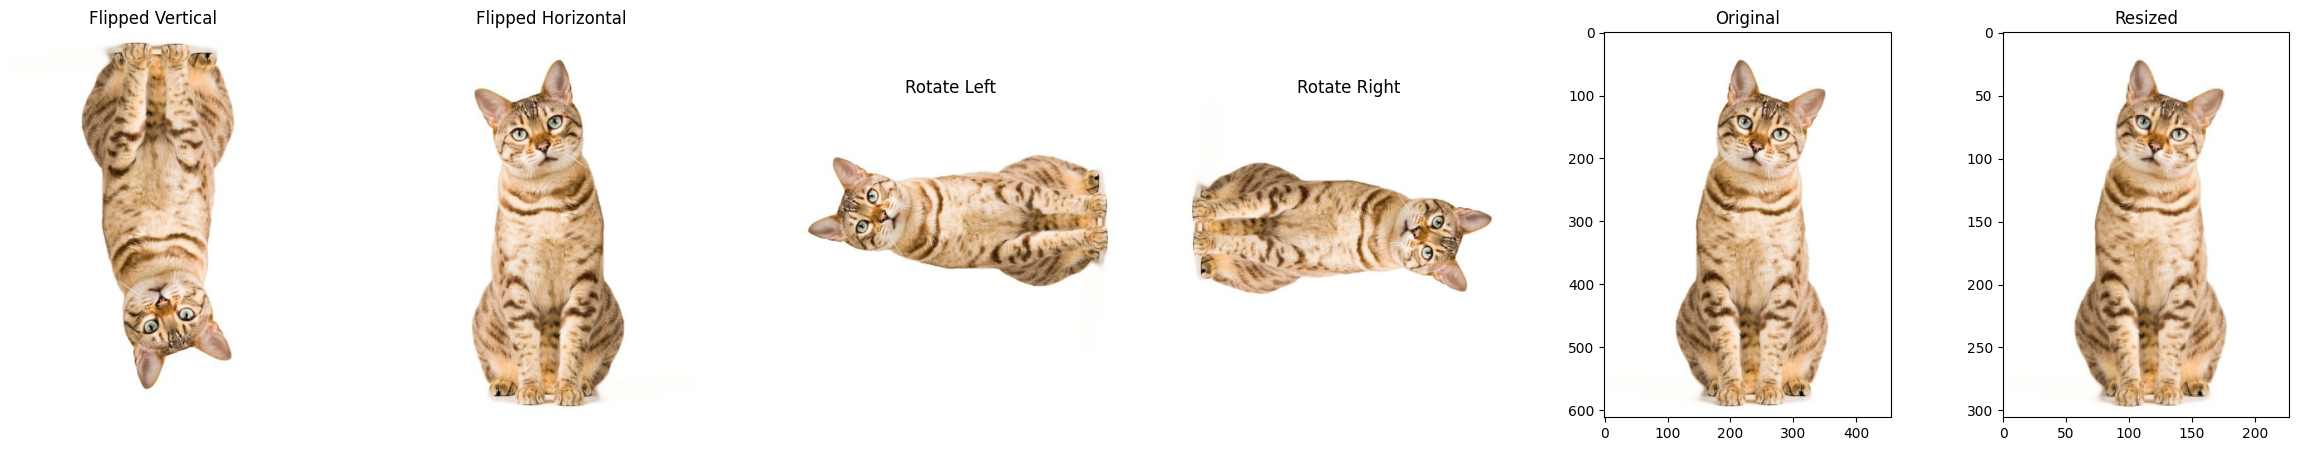

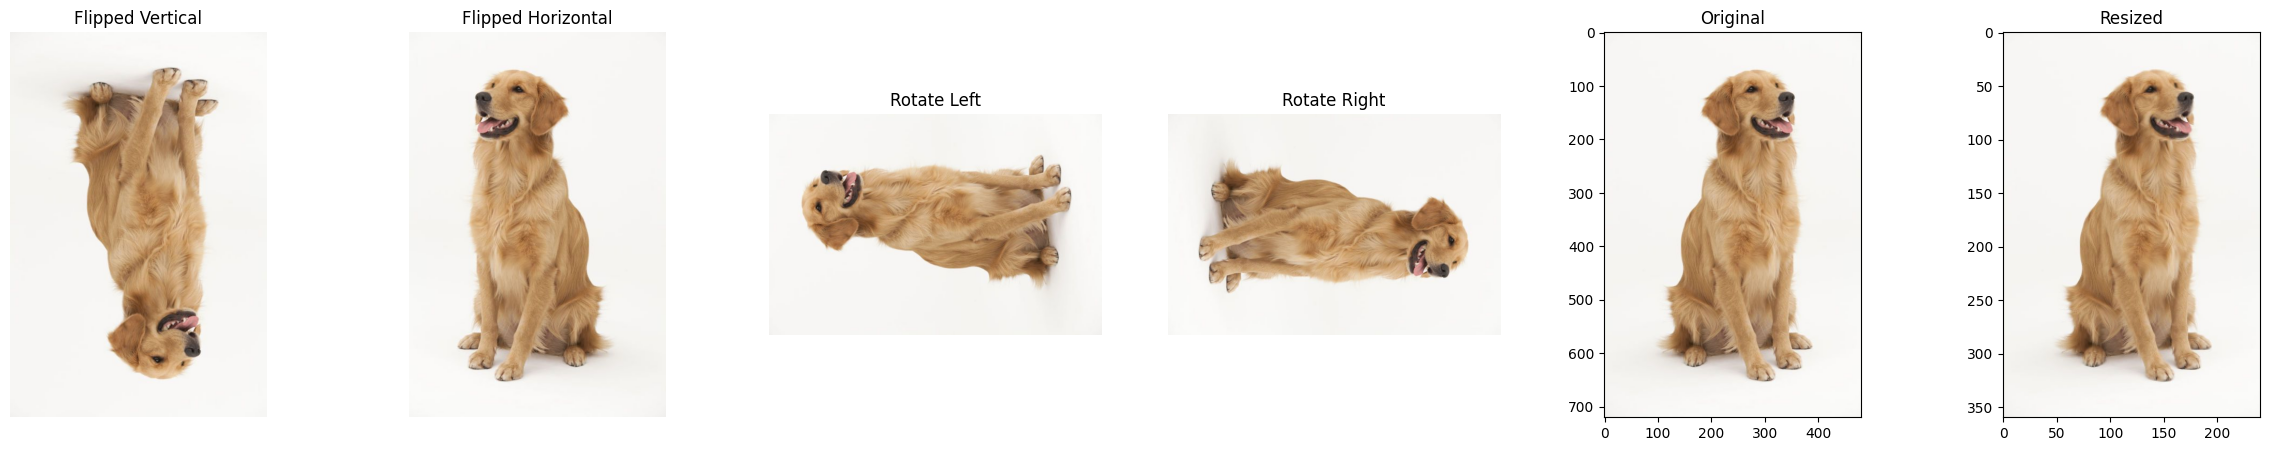

In [3]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
#import os

# Dynamically perform the following operations by reading all images with .jpg extension added within the directory specified.
#directory = "/content/images"

# Get file names within the directory.
#file_names = os.listdir(directory)

# Get only the file names with .jpg extension.
#jpg_files = [file for file in file_names if os.path.isfile(os.path.join(directory, file)) and file.endswith('.jpg')]

# Load images based on file names.
#animals = [cv2.cvtColor(cv2.imread(os.path.join(directory, filename)), cv2.COLOR_BGR2RGB) for filename in jpg_files]

# Manually add file names.
file_names = ['cat1.jpg','cat2.jpg', 'cat3.jpg','dog1.jpg']

# Load images based on file names.
animals = [cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB) for filename in file_names]

# Rotation operations.
rotates_left = [Image.fromarray(np.rot90(animal)) for animal in animals]
rotates_right = [Image.fromarray(np.rot90(animal, 3)) for animal in animals]

# Resizing operations.
resized_animals = [cv2.resize(animal, None, fx=0.50, fy=0.50) for animal in animals]

# Vertical and horizontal flipping operations.
flipped_vertical = [cv2.flip(animal, 0) for animal in animals]
flipped_horizontal = [cv2.flip(animal, 1) for animal in animals]

# Visualization.
for i in range(len(animals)):
    fig, axs = plt.subplots(1, 6, figsize=(30, 5))

    # Vertical flipping operation.
    axs[0].imshow(flipped_vertical[i])
    axs[0].axis('off')
    axs[0].set_title('Flipped Vertical')

    # Horizontal flipping operation.
    axs[1].imshow(flipped_horizontal[i])
    axs[1].axis('off')
    axs[1].set_title('Flipped Horizontal')

    # Left rotation operation.
    axs[2].imshow(rotates_left[i])
    axs[2].axis('off')
    axs[2].set_title('Rotate Left')

    # Right rotation operation.
    axs[3].imshow(rotates_right[i])
    axs[3].axis('off')
    axs[3].set_title('Rotate Right')

    # Original images.
    axs[4].imshow(animals[i])
    axs[4].axis('on')
    axs[4].set_title('Original')

    # Resized images.
    axs[5].imshow(resized_animals[i])
    axs[5].axis('on')
    axs[5].set_title('Resized')

    plt.show()
